In [102]:
import numpy as np
from matplotlib import pyplot as plt
from data import data_utils 
import math

In [103]:
def gaussian_rbf(x, z, theta):
    return np.exp(-np.sum(np.square(x-np.transpose(z)))/theta)

In [104]:
def RMSE(yReal, yPredicted):
    return np.sqrt(np.average((yReal-yPredicted)**2))

In [105]:
x_train, x_valid, x_test, y_train, y_valid, y_test = data_utils.load_dataset('rosenbrock', n_train=200, d=2)

In [125]:
pheta = [0.01,0.1,1.0]
n = len(x_train)
error = []
allError = []
allW = []



for p in pheta:
    
    k = 0
    rk = y_train
    res = np.dot(rk.T,rk)[0][0]
    new_epsilon = n/2 * np.log(res) + k/2 * np.log(n) 
    old_epsilon = float('inf')
    
    Gram = np.zeros([n,n])
    for i in range(n):
        for j in range(n):
            Gram[i][j] = gaussian_rbf(x_train[i],x_train[j],p)  
            
    
    kx = np.zeros([n,len(x_test)])
    for i in range(len(x_test)):
        x = x_test[i]
        for j in range(n):
            kx[j][i] = gaussian_rbf(x,x_train[j],p)
            
            
    used = []
    notUsed = list(range(0,n))
    error = []

    while new_epsilon < old_epsilon:
#     while k < 30:
        k += 1
        
        maxError = np.argmax(abs(rk[notUsed]))
        
#         print(maxError)
        used.append(notUsed.pop(maxError))
        
        
        Q,R = np.linalg.qr(Gram[used].T,mode = 'complete')
        w = np.linalg.inv(R[:k])
        w = np.dot(w,Q.T[:k])
        w = np.dot(w,y_train)

        rk = y_train - np.dot(Gram[used].T,w)
        res = np.dot(rk.T,rk)[0][0]
        old_epsilon = new_epsilon
        new_epsilon = n/2 * np.log(res) + k/2 * np.log(n) 
        
        error.append(old_epsilon)
        
    print(p)
    rk = y_test - np.dot(kx[used].T,w)
    res = np.dot(rk.T,rk)[0][0]

    
    allError.append(error)
    allW.append(res)


0.01
0.1
1.0


In [126]:
allW

[953.3019416562361, 666.0095698817561, 443.34576968291486]

376.200570230793

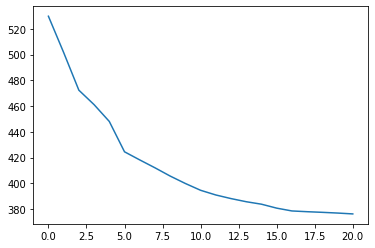

In [112]:
plt.plot(allError[0])
np.min(allError[0])        

361.4127153254684

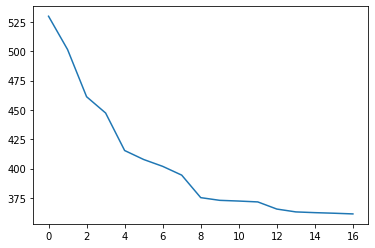

In [95]:
plt.plot(allError[1])
np.min(allError[1])



369.5661913522038

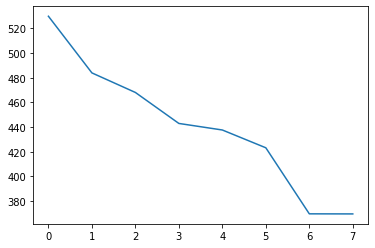

In [96]:
plt.plot(allError[2])
np.min(allError[2])

In [44]:
R.shape

(1000, 1)

In [26]:
# print(Gram[839])

[3.37018942e-075 9.10366509e-047 6.58405465e-182 0.00000000e+000
 1.32157159e-087 2.20284656e-041 2.23311777e-100 2.27118109e-009
 2.07300666e-093 1.75566865e-041 3.36107077e-180 1.51448574e-284
 5.74689231e-049 9.84268576e-060 7.41791242e-141 2.93671840e-048
 0.00000000e+000 4.51868974e-152 3.90368066e-005 1.22839975e-008
 3.26269829e-071 6.53246511e-198 2.83752201e-015 0.00000000e+000
 1.24693715e-044 3.85250604e-073 4.73632576e-022 5.96344493e-105
 1.75894107e-092 1.88555544e-019 1.28353254e-033 2.49520688e-104
 7.91971312e-081 1.69686445e-029 1.27921825e-209 1.57949257e-004
 1.68639430e-162 3.58616638e-045 2.74198003e-122 1.19540892e-026
 1.02731287e-005 5.49287544e-163 2.62391590e-043 4.15316816e-026
 1.12779723e-027 4.77635601e-253 5.60647512e-033 2.48676858e-046
 1.67699569e-003 2.16646592e-025 2.22841953e-154 1.08044904e-126
 2.27495791e-032 8.88697567e-169 1.59341065e-037 5.96132803e-031
 2.10188134e-109 1.88059725e-071 1.45149538e-100 2.93080805e-042
 4.86777797e-047 6.388073